In [43]:
import pandas as pd

In [62]:
!pip3 install opencv-python

In [43]:
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage.io import imread, imshow
from skimage.morphology import disk
from skimage.filters.rank import entropy
from skimage.transform import resize
import skimage.exposure as skie
from PIL import Image
import numpy as np
from torchvision.transforms import ToPILImage
import torch
import cv2

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


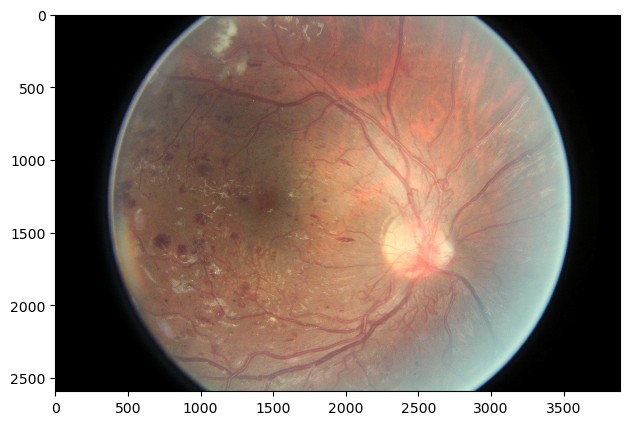

In [44]:
path = '/home/ukjung18/pytorch-classification/traindata/train/16_left.jpeg'
img = imread(path)
imshow(img)

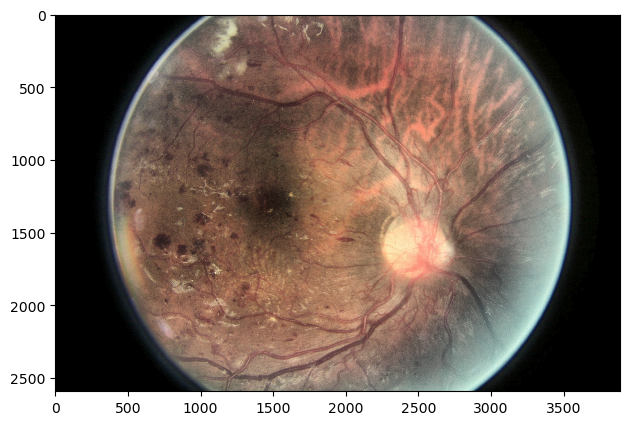

In [45]:
clahe_img = skie.equalize_adapthist(img)
imshow(clahe_img)

/tmp/ipykernel_26547/2898732856.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_img = entropy(shawl_gray, disk(9))
/home/ukjung18/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


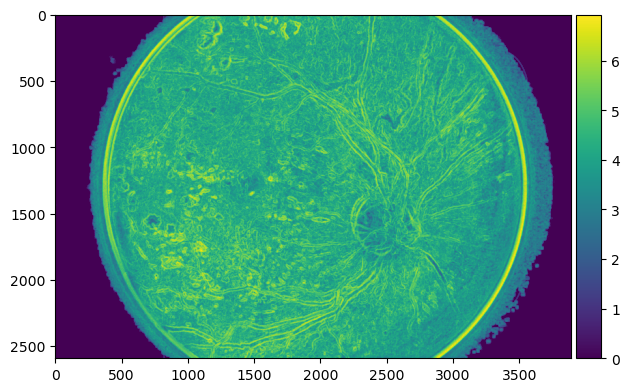

In [46]:
shawl_gray = rgb2gray(clahe_img)
entropy_img = entropy(shawl_gray, disk(9))
imshow(entropy_img)

# x = torch.FloatTensor(entropy_na)
# img = ToPILImage()(x)
# img = Image.fromarray(entropy_na)
# img

In [ ]:
name = path.split('/')[-1]
shawl_gray = resize(shawl_gray, (512, 512))
entropy_na = entropy(shawl_gray, disk(5))
# image=np.repeat(entropy_na[:,:,np.newaxis],3,-1) #3channel
img = Image.fromarray((entropy_na).astype(np.uint8))

In [45]:
train_sol = pd.read_csv("traindata/trainLabels.csv")
train_sol

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [48]:
test_sol = pd.read_csv('retinopathy_solution.csv')
test_sol

,image,level,Usage
0,1_left,0,Private
1,1_right,0,Private
2,2_left,0,Public
3,2_right,0,Public
4,3_left,2,Private
...,...,...,...
53571,44346_right,0,Private
53572,44350_left,0,Private
53573,44350_right,0,Private
53574,44351_left,0,Public


In [4]:
test_sol[test_sol['level'] == 2]

,image,level,Usage
4,3_left,2,Private
5,3_right,2,Private
6,4_left,2,Private
7,4_right,2,Private
14,8_left,2,Private
...,...,...,...
53510,44301_left,2,Private
53512,44302_left,2,Private
53513,44302_right,2,Private
53534,44316_left,2,Private


In [49]:
lv_cnt = test_sol['level'].value_counts()

In [16]:
lv_cnt

0    39533
2     7861
1     3762
3     1214
4     1206
Name: level, dtype: int64

In [50]:
val_sol = {'image':[], 'level':[]}
lv0 = lv_cnt[0]*0.2
lv1 = lv_cnt[1]*0.2
lv2 = lv_cnt[2]*0.2
lv3 = lv_cnt[3]*0.2
lv4 = lv_cnt[4]*0.2
for i in range(53576):
    # if i not in test_sol.index.tolist():
    #     continue
    if (test_sol['level'][i] == 0) & (val_sol['level'].count(0) <= lv0):
        val_sol['image'].append(test_sol['image'][i])
        # val_sol['image'].append(test_sol['image'][i+1])
        val_sol['level'].append(test_sol['level'][i])
        # val_sol['level'].append(test_sol['level'][i+1])
        test_sol.drop(index=i, inplace=True)
        # test_sol.drop(index=i+1, inplace=True)

    elif (test_sol['level'][i] == 1) & (val_sol['level'].count(1) <= lv1):
        val_sol['image'].append(test_sol['image'][i])
        # val_sol['image'].append(test_sol['image'][i+1])
        val_sol['level'].append(test_sol['level'][i])
        # val_sol['level'].append(test_sol['level'][i+1])
        test_sol.drop(index=i, inplace=True)
        # test_sol.drop(index=i+1, inplace=True)
    
    elif (test_sol['level'][i] == 2) & (val_sol['level'].count(2) <= lv2):
        val_sol['image'].append(test_sol['image'][i])
        # val_sol['image'].append(test_sol['image'][i+1])
        val_sol['level'].append(test_sol['level'][i])
        # val_sol['level'].append(test_sol['level'][i+1])
        test_sol.drop(index=i, inplace=True)
        # test_sol.drop(index=i+1, inplace=True)

    elif (test_sol['level'][i] == 3) & (val_sol['level'].count(3) <= lv3):
        val_sol['image'].append(test_sol['image'][i])
        # val_sol['image'].append(test_sol['image'][i+1])
        val_sol['level'].append(test_sol['level'][i])
        # val_sol['level'].append(test_sol['level'][i+1])
        test_sol.drop(index=i, inplace=True)
        # test_sol.drop(index=i+1, inplace=True)

    elif (test_sol['level'][i] == 4) & (val_sol['level'].count(4) <= lv4):
        val_sol['image'].append(test_sol['image'][i])
        # val_sol['image'].append(test_sol['image'][i+1])
        val_sol['level'].append(test_sol['level'][i])
        # val_sol['level'].append(test_sol['level'][i+1])
        test_sol.drop(index=i, inplace=True)
        # test_sol.drop(index=i+1, inplace=True)

In [51]:
val_sol = pd.DataFrame(val_sol)

In [52]:
data_dict = {'train':[], 'test':[], 'val':[]}
path = 'traindata/train_entropy/'
for i, l in zip(train_sol['image'],train_sol['level']):
    data_dict['train'].append((path+i+'.jpeg', l))
path = 'traindata/test_entropy/'
for i, l in zip(test_sol['image'],test_sol['level']):
    data_dict['test'].append((path+i+'.jpeg', l))
path = 'traindata/val_entropy/'
for i, l in zip(val_sol['image'],val_sol['level']):
    data_dict['val'].append((path+i+'.jpeg', l))

In [53]:
import pickle
pickle.dump(data_dict, open('traindata/entropy_data_dict.pickle', 'wb'))

In [24]:
import shutil
for i in val_sol['image']:
    shutil.move("/home/ukjung18/pytorch-classification/traindata/test/"+i+".jpeg", "/home/ukjung18/pytorch-classification/traindata/val/"+i+".jpeg")

In [1]:
import pickle
data = pickle.load(open('/home/ukjung18/pytorch-classification/traindata/data_dict.pickle', 'rb'))
train_set, test_set, val_set = data['train'], data['test'], data['val']

In [2]:
test_set[10000]

('traindata/test/17225_left.jpeg', 0)

In [5]:
len(train_set)

35126

In [4]:
len(val_set)

10718

In [11]:
len(test_set)

NameError: name 'test_set' is not defined

In [12]:
import pickle
with open('/home/ukjung18/pytorch-classification/data/y_pred.pickle', 'rb') as f:
    preds = pickle.load(f)
with open('/home/ukjung18/pytorch-classification/data/y_true.pickle', 'rb') as f:
    targets = pickle.load(f)

In [79]:
conf_mat = [[29525,1830,237,22,12],
            [1436,1222,349,0,2],
            [808,1314,3656,470,40],
            [24,22,442,456,27],
            [23,29,202,294,416]]

In [13]:
target_names = {0: 'Normal',
               1: 'Mild',
               2: 'Moderate',
               3: 'Severe',
               4: 'Proliferative'}

In [14]:
label = ['Normal', 'Mild', 'Moderate', 'Severe', 'Proliferative']
cf = pd.DataFrame(conf_mat, index=label, columns=label)

NameError: name 'pd' is not defined

In [15]:
y_targets = []
y_preds= []
for i,j in zip(targets, preds):
    y_targets+=i
    y_preds+=j

In [16]:
y_preds = [int(item) for item in y_preds]
y_targets = [int(item) for item in y_targets]

In [18]:
import numpy as np
y_onehot_test = np.eye(5)[y_targets]
y_onehot_pred = np.eye(5)[y_preds]

In [107]:
y_onehot_pred

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [112]:
y_pred_ls = []
for i in y_pred:
    for j in i:
        y_pred_ls.append(j.item())

In [1]:
import pickle
with open('/home/ukjung18/pytorch-classification/data/y_score.pickle', 'rb') as f:
    scores = pickle.load(f)

In [3]:
y_score = []
for scr in scores:
    y_score+=scr.tolist()

In [4]:
sc_list = []
for sc in y_score:
    sc_list.append(sc[0])

In [6]:
thresholds = [-0.5 + i for i in range(5)]

In [14]:
sc_list

[0.07255217432975769,
 0.10684120655059814,
 0.05345781147480011,
 1.2898292541503906,
 0.03946124017238617,
 1.1142135858535767,
 0.6425840258598328,
 -0.004507154226303101,
 -0.0137881338596344,
 0.045182064175605774,
 0.9769544005393982,
 0.9803934693336487,
 0.06916831433773041,
 0.3880195617675781,
 2.0157470703125,
 0.4045855402946472,
 0.00014963746070861816,
 0.16515156626701355,
 0.10950831323862076,
 0.14747613668441772,
 0.04195362329483032,
 0.02591116726398468,
 0.14839212596416473,
 0.04802829027175903,
 -0.028951004147529602,
 0.06588283181190491,
 0.043173208832740784,
 1.806174874305725,
 -0.0007608383893966675,
 0.3095496892929077,
 0.08052042126655579,
 0.019217655062675476,
 0.03938890993595123,
 0.029304131865501404,
 0.14088350534439087,
 0.2905225455760956,
 0.3329814076423645,
 0.05746486037969589,
 2.3619186878204346,
 0.08770757913589478,
 0.141598641872406,
 0.14247679710388184,
 0.05599368363618851,
 1.4773190021514893,
 0.03280685842037201,
 -0.001442566514

In [ ]:
-0.5 0.5 1.5 2.5 3.5

In [12]:
from scipy.special import softmax
score_0 = []
for sc in sc_list:
    score_0.append(softmax([sc-th for th in thresholds]))

score_1 = []
for sc in sc_list:
    score_1.append(softmax([thresholds[0]-sc]+[sc-th for th in thresholds[2:]]))

score_2 = []
for sc in sc_list:
    score_2.append(softmax([thresholds[0]-sc]+[sc-th for th in thresholds[1:]]))

score_3 = []
for sc in sc_list:
    score_3.append(softmax([thresholds[0]-sc]+[sc-th for th in thresholds[1:]]))

score_4 = []
for sc in sc_list:
    score_4.append(softmax([thresholds[0]-sc]+[sc-th for th in thresholds[1:]]))

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from itertools import cycle

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


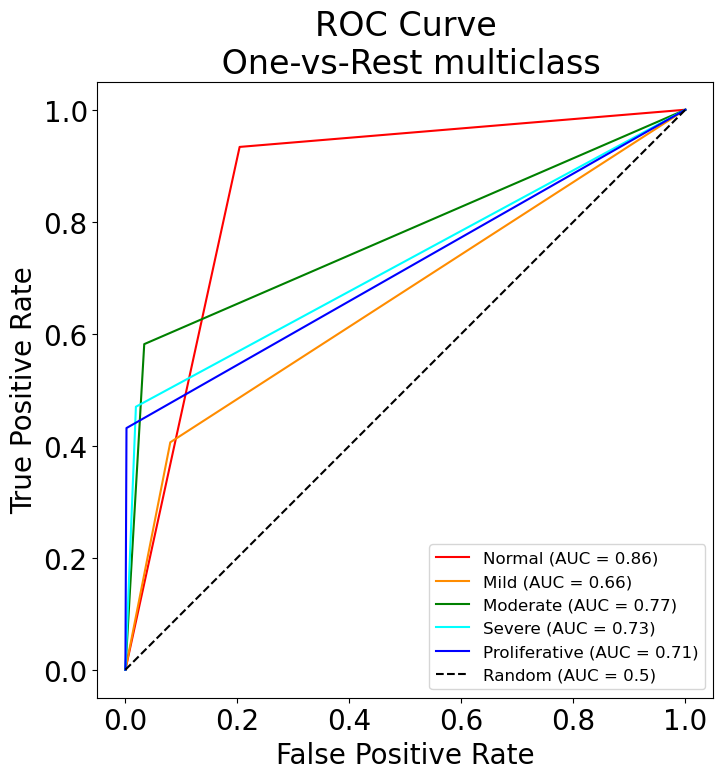

In [19]:
n_classes = 5
fig, ax = plt.subplots(figsize=(10, 8))
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=30) # figure title 폰트 크기

colors = cycle(["red", "darkorange", "green", "aqua", "blue", "purple"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_onehot_pred[:, class_id],
        name=f"{target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve\n One-vs-Rest multiclass")
plt.legend()
plt.show()
# plt.savefig('/home/ukjung18/pytorch-classification/data/roc.png', dpi=600)

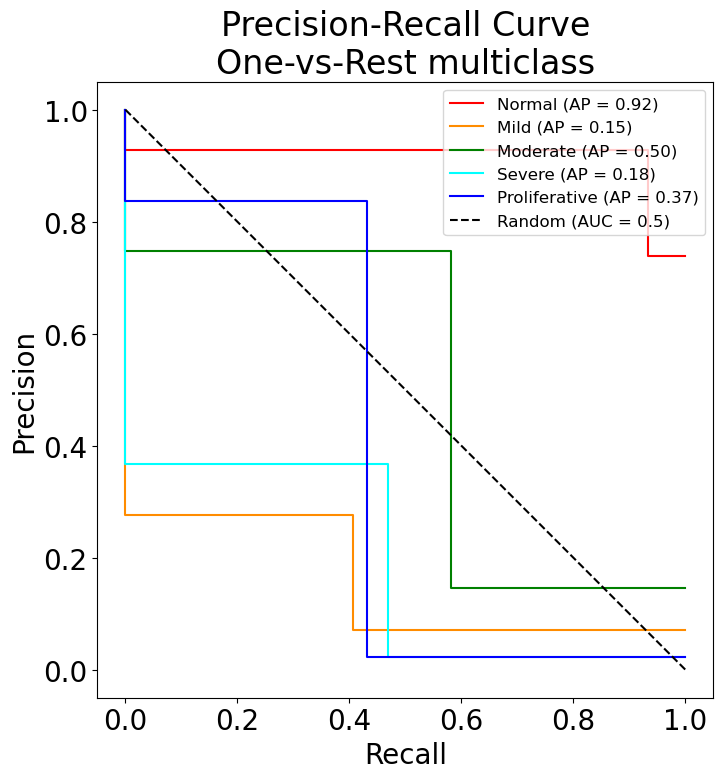

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=30) # figure title 폰트 크기

colors = cycle(["red", "darkorange", "green", "aqua", "blue", "purple"])
for class_id, color in zip(range(5), colors):
    PrecisionRecallDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_onehot_pred[:, class_id],
        name=f"{target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [1, 0], "k--", label="Random (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve\nOne-vs-Rest multiclass")
plt.legend()
plt.show()
# plt.savefig('/home/ukjung18/GIE1/GIE/GIE-master/rel_pr.png', dpi=600)

In [35]:
from pytorch_grad_cam.grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

In [55]:
from torchvision import transforms
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np
import cv2, torch
# load the model
# model = models.inception_v3(pretrained=True)
# for param in model.parameters():
#     param.requires_grad = False
# model.fc = torch.nn.Linear(2048, 5)
model = models.inception_v3()
model.fc = nn.Linear(model.fc.in_features, 5)
weights = torch.load('/home/ukjung18/pytorch-classification/save_path/5save/final_weights.pt')
model.load_state_dict(weights, strict=True)
model.eval()
model.cuda()

final_conv = 'Mixed_7c'

# optimizer = torch.optim.SGD(model.fc.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)

features_blobs = []

def hook_feature(module, input, output):
    features_blobs.append(output.data.cpu().numpy())

model._modules.get(final_conv).register_forward_hook(hook_feature)

# generate class activation mapping for the top1 prediction
def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[class_idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

# def get_cam(net, features_blobs, img_pil, classes, root_img):
params = list(model.parameters())
    
weight_softmax = np.squeeze(params[-2].data.cpu().numpy())

normalize = transforms.Normalize(
    mean=[0.32028111815452576, 0.22441646456718445, 0.16100691258907318],
    std=[0.30257484316825867, 0.2186276763677597, 0.17424802482128143]
)
preprocess = transforms.Compose([
    transforms.Resize((512,512)),
    transforms.ToTensor(),
    normalize
])
#20, 114, 
filename = '/home/ukjung18/pytorch-classification/traindata/train/687_left.jpeg'
img_pil = Image.open(filename)

img_tensor = preprocess(img_pil)
img_variable = Variable(img_tensor.unsqueeze(0)).cuda()
logit = model(img_variable)

# h_x = logit.logits.log_softmax(1).data.squeeze()
h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)

classes = {0: 'Normal', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferate'}

# output: the prediction
for i in range(0, 2):
    line = '{:.3f} -> {}'.format(probs[i], classes[idx[i].item()])
    print(line)

CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[0].item()])

# render the CAM and output
print('output CAM.jpg for the top1 prediction: %s' % classes[idx[0].item()])
img = cv2.imread(filename)
height, width, _ = img.shape
CAM = cv2.resize(CAMs[0], (width, height))
heatmap = cv2.applyColorMap(CAM, cv2.COLORMAP_JET)
result = heatmap * 0.3 + img * 0.5
# cv2.imshow(result, color)
# cv2.imwrite('/home/ukjung18/pytorch-classification/data/cam3.jpg', result)

0.947 -> Severe
0.030 -> Proliferate
output CAM.jpg for the top1 prediction: Severe


True